# Practical Lab-6 Rohit Kumar 8895806


In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score)


In [115]:

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df)
iris_df['target'] = iris.target


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [116]:
type(iris)


sklearn.utils._bunch.Bunch

In [117]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [119]:
# check the types of the features and response
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [120]:

# Create a subset with 'virginica' and 'versicolor' classes
subset_df = iris_df[iris_df['target'].isin([1, 2])]
subset_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [121]:

# Split the subset into features (X) and labels (y)
X = subset_df.iloc[:, :-1]
y = subset_df['target']

In [122]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:

# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [124]:

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


In [125]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.95
Precision: 1.0
Recall: 0.9166666666666666
F1 Score: 0.9565217391304348
Confusion Matrix:
 [[11  1]
 [ 0  8]]


## Performance Evaluation of the Logistic Regression model

Accuracy: Accuracy is a measure of how well a classification model correctly predicts the overall data. In this case, the accuracy is 0.95, which means the model has correctly classified 95% of the total instances.

Precision: Precision is a measure of how many of the positively classified instances are actually true positives. A precision of 1.0 indicates that all the instances predicted as positive are indeed true positives.

Recall: Recall, also known as sensitivity or true positive rate, measures how many of the actual positive instances were correctly classified. In this case, the recall is 0.9167, which means the model identified 91.67% of the actual positive instances.

F1 Score: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both measures. It is particularly useful when you want to find a balance between precision and recall. In this case, the F1 score is 0.9565.

Confusion Matrix: The confusion matrix is a table that summarizes the performance of a classification model. It shows the number of correct and incorrect predictions made by the model, broken down by true and predicted class labels. In this case, the confusion matrix indicates that there are 11 true negatives (correctly predicted negatives), 1 false positive (incorrectly predicted as positive), 0 false negatives (incorrectly predicted as negative), and 8 true positives (correctly predicted positives).

Overall, the model has a high accuracy and precision, indicating it performs well in classifying both positive and negative instances. The recall shows that it correctly identifies a high percentage of the actual positive instances. The F1 score provides a balanced evaluation, considering both precision and recall. The confusion matrix further illustrates the model's performance in terms of true negatives, false positives, false negatives, and true positives.

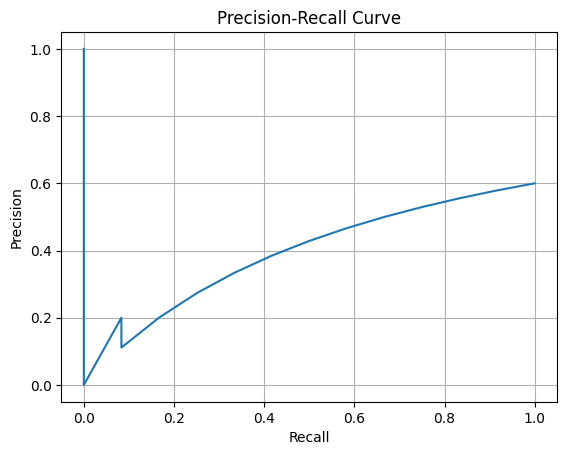

In [131]:
# Calculate precision and recall values
fpr, tpr, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=1)

# Plot the Precision-Recall curve
plt.plot(tpr, fpr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

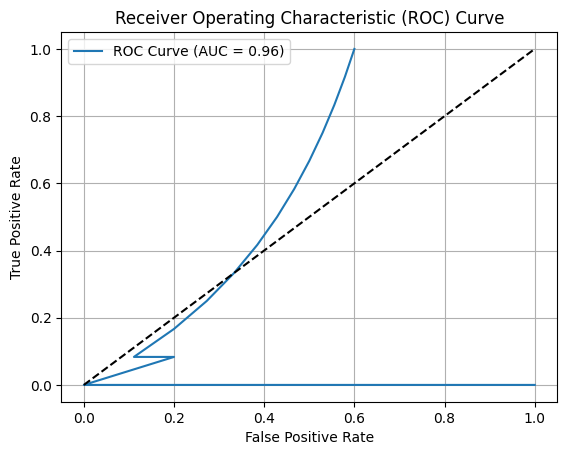

In [132]:

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()